## **財務演算法作業二**

## **作業說明**
![作業說明一](\作業說明一.png)
![作業說明二](\作業說明二.png)
![作業說明三](\作業說明三.png)
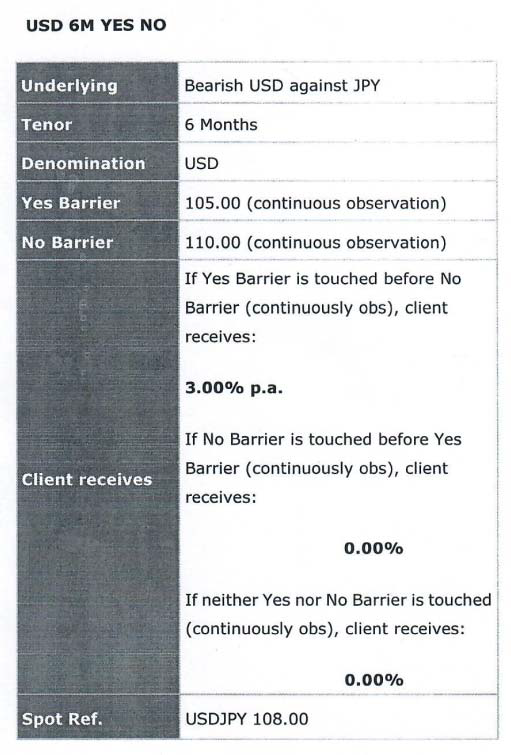

## **注意事項**
**FX spot Rate + Swap Point -> 遠期匯率** <br>

summarize重要結論 <br>
重要資訊: 姓名學號系級 <br>
寄到dongmy@ms5.hinet.net <br>

In [1]:
%matplotlib inline
import numpy as np
from math import sqrt, exp, log
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
## 市場資料
T = 1/2
r1m, r2m, r3m, r6m, r12m = 0.001675, 0.00207,0.0023845,0.0035350,0.005881
fx_spot = 108
sp1m, sp2m, sp3m, sp6m, sp12m = -0.01325, -0.0425, -0.05855, -0.1221, -0.301
y_barrier = 105
n_barrier = 110

fx_6m = fx_spot + sp6m # 6個月的遠期匯率
rf6m = log(exp(r6m/2)*fx_spot/fx_6m)*2

In [3]:
## Heston Model 參數
## 應該是要用交易的資料calibration，但這邊老師直接給

v0 = 0.0102401
kappa = 1.171979
theta = 0.0141483
rho = 0.128199
sigma = 0.336611

n = 180

True
得到報酬


Text(0.5, 1.0, 'Volatility')

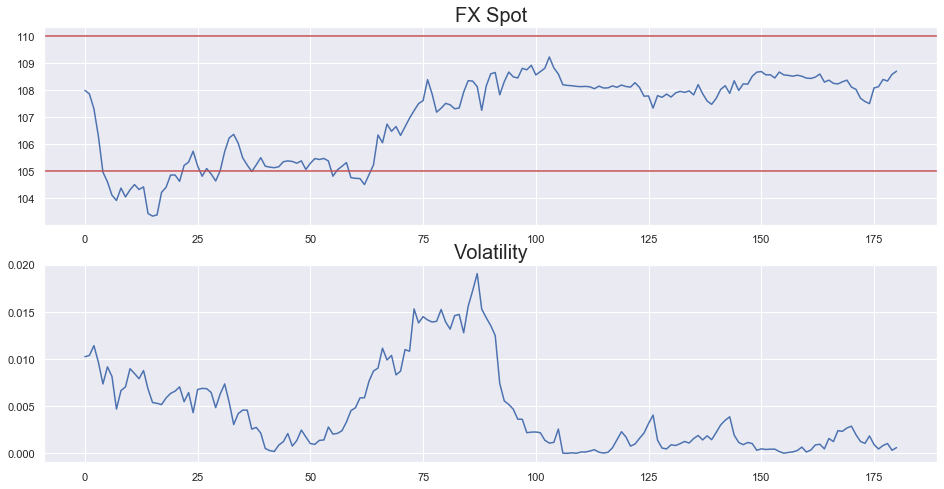

In [4]:
zero_cov_rand = np.random.normal(size=(180,2)) #抽零相關的樣本
cov_matrix = np.array([[1,rho],[rho,1]]) #共變異數矩陣
cho_cov = np.linalg.cholesky(cov_matrix) # cholesky
rho_cov_rand = zero_cov_rand.dot(cho_cov.T) #有相關性的brownian motion

# rho_cov_rand = np.random.multivariate_normal(mean=[0,0], cov=cov_matrix, size=180) 
# 也可以直接模擬有相關性的 brownian motion

# np.cov(x,rowvar=False)
# cov-matrix檢查

S = [fx_spot]
V = [v0]
dt = T/n
touch_Y = False
touch_N = False
get_payoff = False
for i in range(180):
    dS = (r6m-rf6m)*S[-1]*dt + sqrt(V[-1])*S[-1]*rho_cov_rand[i][0]*sqrt(dt)
    dV = kappa*(theta-V[-1])*dt + sigma*sqrt(V[-1])*rho_cov_rand[i][1]*sqrt(dt)
    if (S[-1]+dS <= y_barrier) & (not touch_N):
        touch_Y = True
    if (S[-1]+dS >= n_barrier) & (not touch_Y):
        touch_N = True
    V.append(abs(V[-1]+dV))
    S.append(S[-1]+dS)
if touch_Y & (not touch_N):
    get_payoff = True
    
print(get_payoff)
if touch_N: 
    print("先碰到N barrier")
elif (not touch_Y): 
        print("沒碰到Y barrier")
else:
    print("得到報酬")
x = np.arange(len(S))  
plt.figure(figsize=(16,8))
plt.subplot(211)
plt.plot(x,S)
plt.axhline(105, color= 'r')
plt.axhline(110, color= 'r')
plt.title('FX Spot',size=20)
plt.subplot(212)
plt.plot(x,V)
plt.title('Volatility',size=20)

得到報酬:True


Text(0.5, 1.0, 'Volatility')

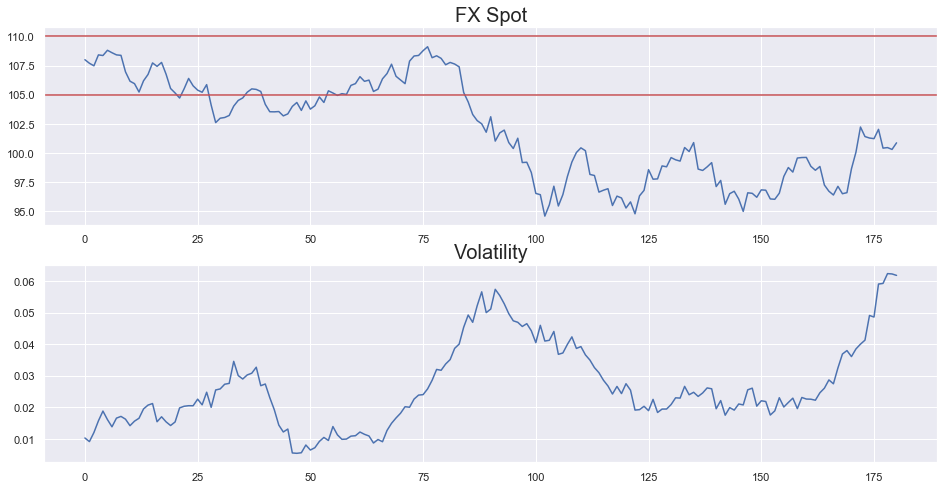

In [15]:
import numpy as np
from math import sqrt, exp, log

# 跑一次monte_carlo得一條路徑，看使否得到報酬
def monte_carlo(r,fx_spot,y_barrier,n_barrier,rf,v0,kappa,theta,rho,sigma,n,T):
    
    ## 抽樣
    zero_cov_rand = np.random.normal(size=(n,2)) #抽零相關的樣本
    cov_matrix = np.array([[1,rho],[rho,1]]) #共變異數矩陣
    cho_cov = np.linalg.cholesky(cov_matrix) # cholesky
    rho_cov_rand = zero_cov_rand.dot(cho_cov.T) #有相關性的brownian motion
    
    ## 模擬 S, V路徑，檢查是否得到報酬
    S = [fx_spot]
    V = [v0]
    dt = T/n
    touch_Y = False
    touch_N = False
    get_payoff = False
    for i in range(n):
        dS = (r-rf)*S[-1]*dt + sqrt(V[-1])*S[-1]*rho_cov_rand[i][0]*sqrt(dt)
        dV = kappa*(theta-V[-1])*dt + sigma*sqrt(V[-1])*rho_cov_rand[i][1]*sqrt(dt)
        if (S[-1]+dS <= y_barrier) & (not touch_N):
            touch_Y = True
        if (S[-1]+dS >= n_barrier) & (not touch_Y):
            touch_N = True
        V.append(abs(V[-1]+dV))
        S.append(S[-1]+dS)
    if touch_Y & (not touch_N):
        get_payoff = True
    return get_payoff,S,V

get_payoff, S, V = monte_carlo(r6m,fx_spot,y_barrier,n_barrier,rf6m,v0,kappa,theta,rho,sigma,n,T)


print('得到報酬:{}'.format(get_payoff))
x = np.arange(len(S))  
plt.figure(figsize=(16,8))
plt.subplot(211)
plt.plot(x,S)
plt.axhline(105, color= 'r')
plt.axhline(110, color= 'r')
plt.title('FX Spot',size=20)
plt.subplot(212)
plt.plot(x,V)
plt.title('Volatility',size=20)

In [16]:
result_list = []
S_list = []
V_list = []
nos = 10000
for i in range(nos):
    result,S,V = monte_carlo(r6m,fx_spot,y_barrier,n_barrier,rf6m,v0,kappa,theta,rho,sigma,n,T)
    if result:
        result_list.append(1)
    else:
        result_list.append(0)
    S_list.append(S)
    V_list.append(V)
    if i % 10000 == 0:
        print("已經模擬{:^8d}次".format(i+1))

print('成功率 = {:>4f}%'.format(sum(result_list) / len(result_list)*100))

已經模擬   1    次
成功率 = 39.910000%


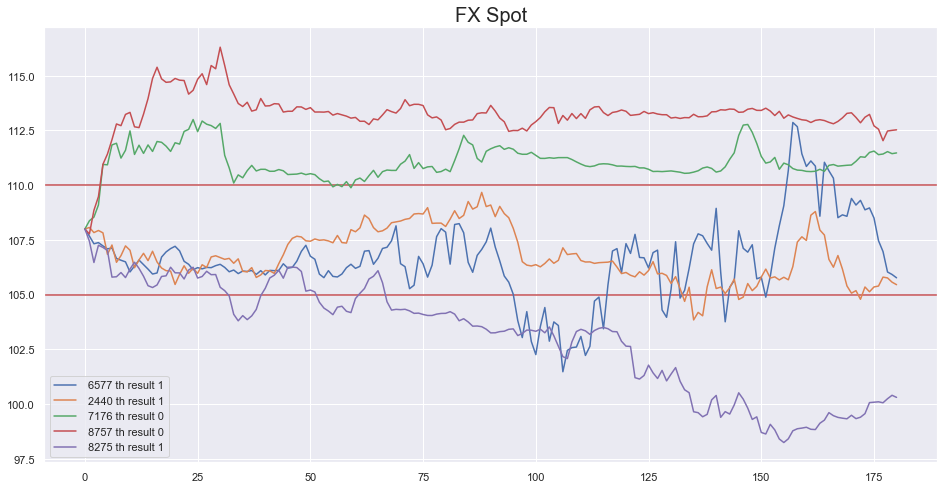

In [7]:
## 想做一個按鈕 可以選你要看幾次模擬結果
sample = np.random.randint(nos,size=5)
plt.figure(figsize=(16,8))
plt.axhline(105, color= 'r')
plt.axhline(110, color= 'r')
plt.title('FX Spot',size=20)
x = np.arange(len(S))
for i in sample:
    plt.plot(x,S_list[i],label='{:^6d}th result {}'.format(i,result_list[i]))
plt.legend()

得到報酬:1


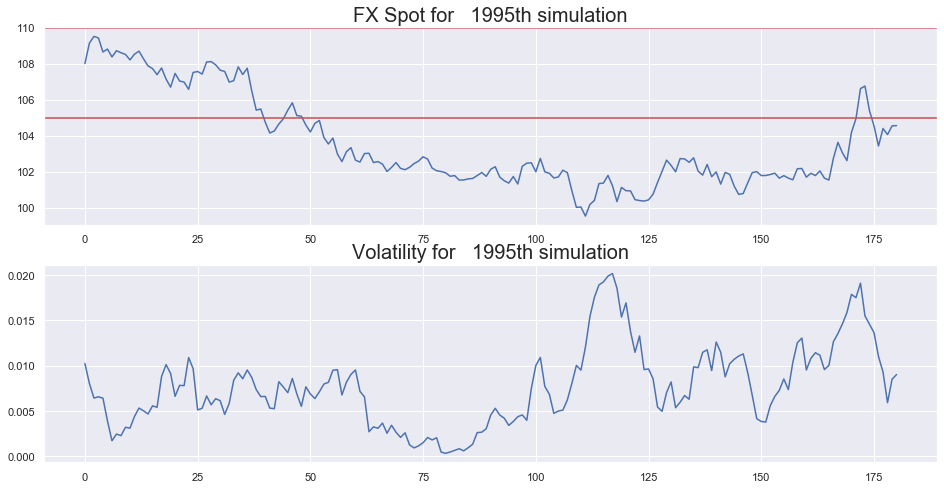

In [8]:
## 想做一個按鈕 可以選你要看第幾次模擬結果
i = np.random.randint(nos,size=1)[0]
S = S_list[i]
V = V_list[i]
x = np.arange(len(S))  
plt.figure(figsize=(16,8))
plt.subplot(211)
plt.plot(x,S)
plt.axhline(105, color= 'r')
plt.axhline(110, color= 'r')
plt.title('FX Spot for {:>6d}th simulation'.format(i),size=20)
plt.subplot(212)
plt.plot(x,V)
plt.title('Volatility for {:>6d}th simulation'.format(i),size=20)
print('得到報酬:{}'.format(result_list[i]))

In [9]:
p = sum(result_list) / len(result_list)
(100*(1-p)+100*exp(0.03/2)*p)*exp(-r6m/2)

100.42550337168124